<a href="https://colab.research.google.com/github/Kaggle-challange-group8/Titanic_space_ship_group_8/blob/main/Kaggle_challange_group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called df and a target column called 'target'
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset first
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
cat_cols = X_train.select_dtypes(include='object').columns

# Apply label encoding
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))



NameError: name 'df' is not defined

In [ ]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: binary classification
X = train_df.drop(columns=['Transported', 'PassengerId', 'Name', 'Cabin'])
y = train_df['Transported'].astype(int)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_val)


NameError: name 'train_df' is not defined

In [ ]:
shap.summary_plot(shap_values, X_val)


In [ ]:
import pandas as pd
test_datapath ='https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv'
test_df = pd.read_csv(test_datapath)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train_dataset='https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv'
train_df=pd.read_csv(train_dataset)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
# Check shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check nulls
train_df.isnull().sum().sort_values(ascending=False)


Train shape: (8693, 14)
Test shape: (4277, 13)


,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


In [2]:

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv")


In [4]:
test_passenger_ids = test_df['PassengerId']


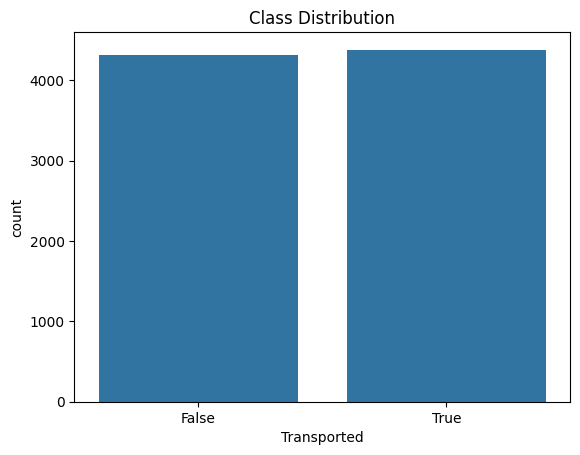

In [5]:
# Class Distribution
sns.countplot(x='Transported', data=train_df)
plt.title("Class Distribution")
plt.show()


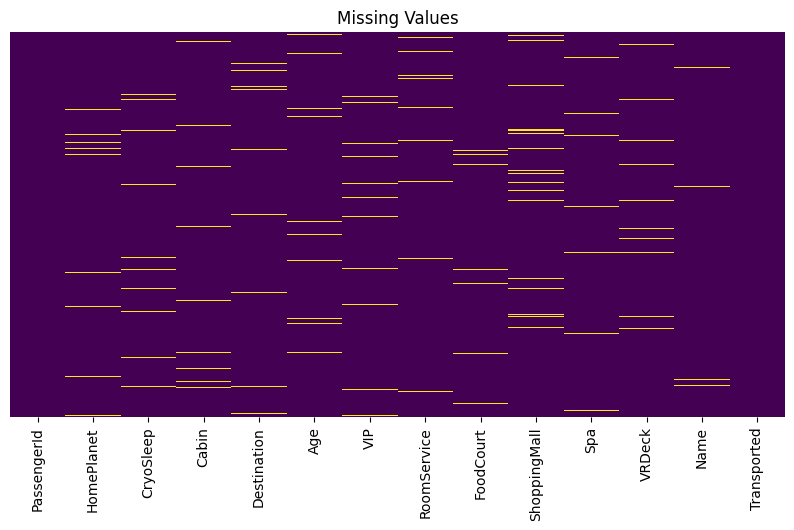

In [6]:
# Missing Values
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values")
plt.show()

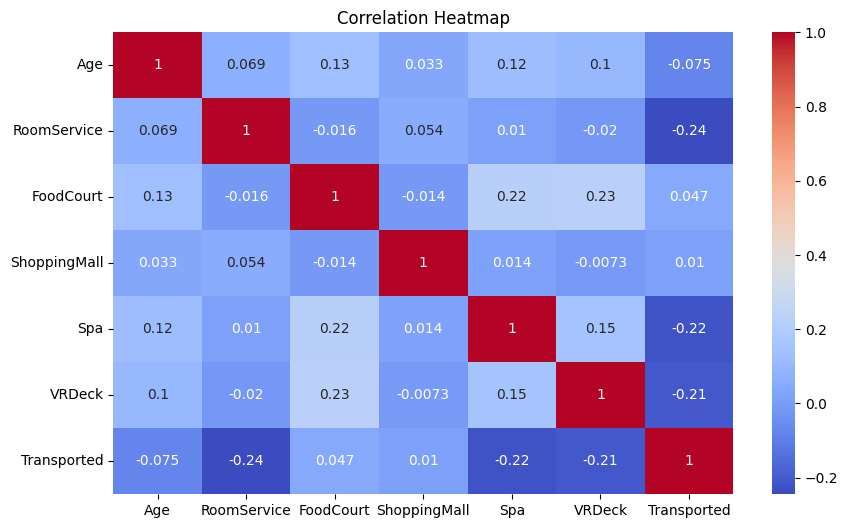

In [7]:
# Correlation Heatmap
df_corr = train_df.copy()
df_corr['Transported'] = df_corr['Transported'].astype(int)
df_corr = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

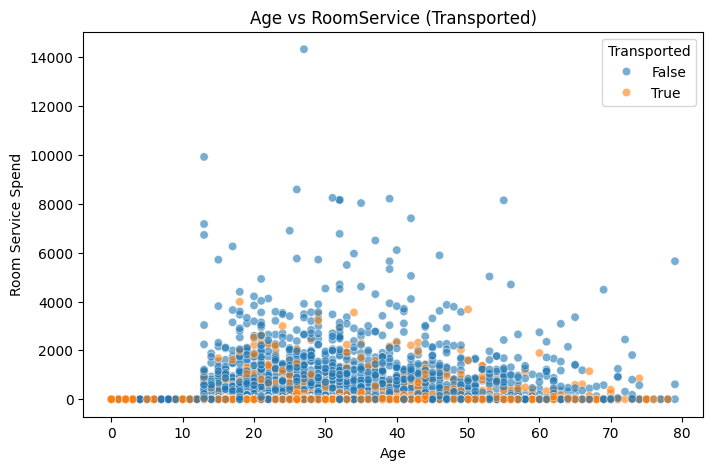

In [11]:
# Age vs RoomService (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Age', y='RoomService', hue=train_df['Transported'], alpha=0.6)
plt.title('Age vs RoomService (Transported)')
plt.xlabel('Age')
plt.ylabel('Room Service Spend')
plt.legend(title='Transported')
plt.show()


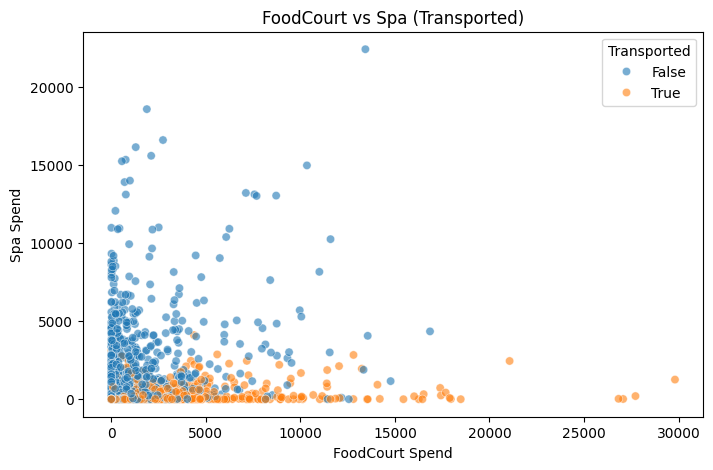

In [12]:
# FoodCourt vs Spa (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='FoodCourt', y='Spa', hue=train_df['Transported'], alpha=0.6)
plt.title('FoodCourt vs Spa (Transported)')
plt.xlabel('FoodCourt Spend')
plt.ylabel('Spa Spend')
plt.legend(title='Transported')
plt.show()

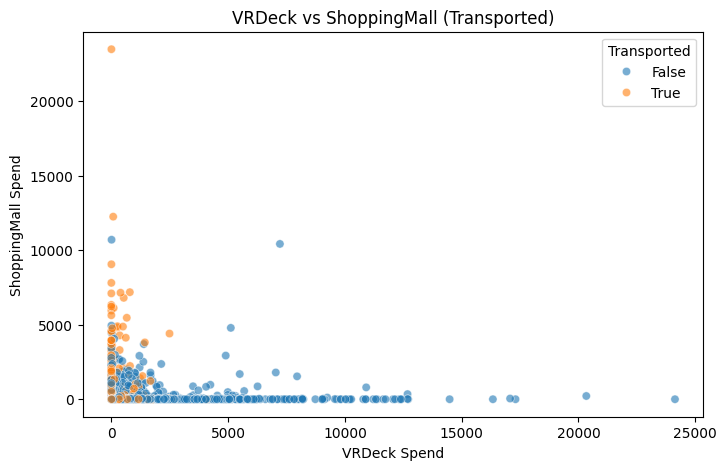

In [13]:
# VRDeck vs ShoppingMall
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='VRDeck', y='ShoppingMall', hue=train_df['Transported'], alpha=0.6)
plt.title('VRDeck vs ShoppingMall (Transported)')
plt.xlabel('VRDeck Spend')
plt.ylabel('ShoppingMall Spend')
plt.legend(title='Transported')
plt.show()

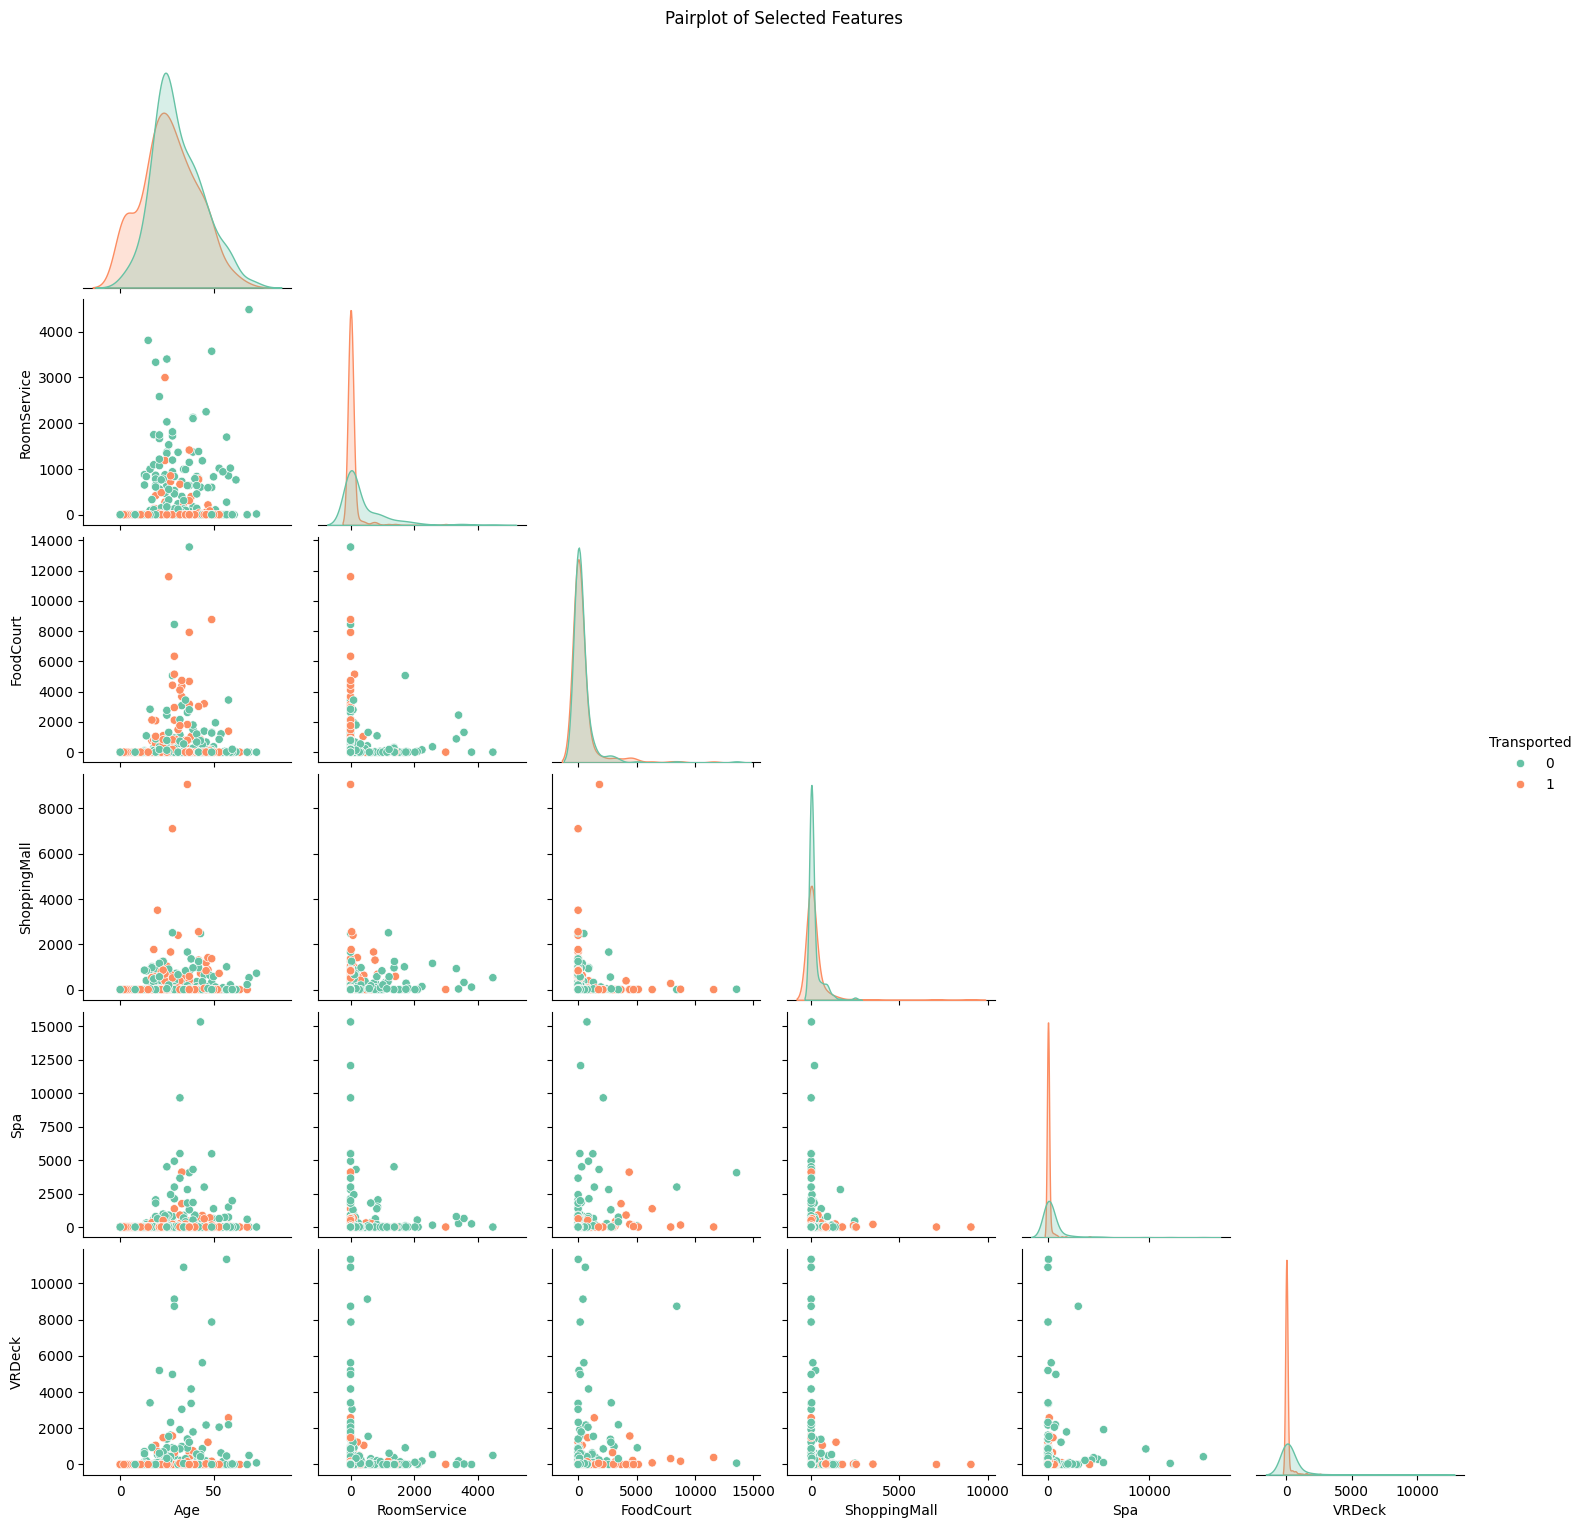

In [19]:

# Combine features and target for plotting

eda_df = train_df.copy()
eda_df['Transported'] = train_df['Transported'].astype(int)


# Limit numeric features to avoid overcrowding
plot_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot pairplot (use sample to speed it up)
sns.pairplot(eda_df.sample(500), vars=plot_features, hue='Transported', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("pairplot_features.png")
plt.show()


In [21]:
drop_cols = ['PassengerId', 'Name', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [22]:

# Separate label
y = train_df['Transported'].astype(int)
train_df.drop(columns=['Transported'], inplace=True)

In [23]:

# Identify column types
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()


In [24]:

# Fill missing values
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
train_df[categorical_cols] = train_df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
test_df[numeric_cols] = test_df[numeric_cols].fillna(train_df[numeric_cols].median())
test_df[categorical_cols] = test_df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


# One-hot encode
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

# Align columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)


/tmp/ipython-input-24-727208559.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[categorical_cols] = train_df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
/tmp/ipython-input-24-727208559.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[categorical_cols] = test_df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)
X_scaled = np.nan_to_num(X_scaled)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_test = scaler.transform(test_df)
X_test = np.nan_to_num(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [26]:

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
#train_df.drop(columns=['TotalSpend'], inplace=True)

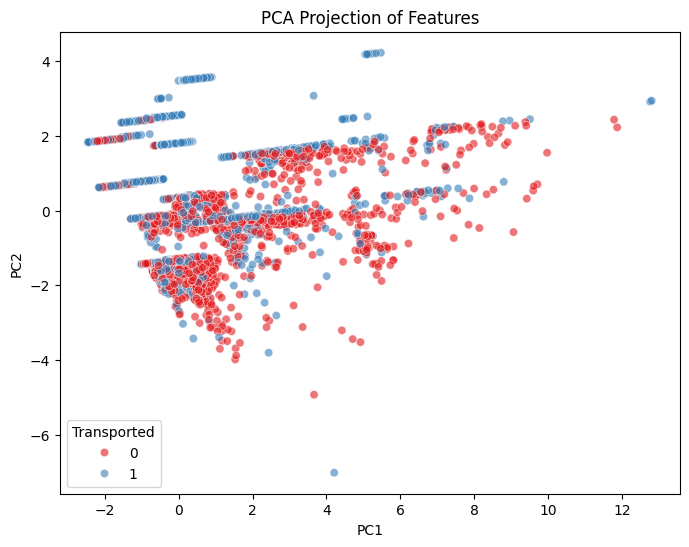

In [27]:
from sklearn.decomposition import PCA

# Ensure data is scaled
X_pca = PCA(n_components=2).fit_transform(X_scaled.reshape(X_scaled.shape[0], -1))

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Transported'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Transported', palette='Set1', alpha=0.6)
plt.title('PCA Projection of Features')
plt.savefig("pca_projection.png")
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(64, kernel_size=3, padding='same', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),

    Conv1D(128, kernel_size=3, padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(64, kernel_size=3, padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    GlobalAveragePooling1D(),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # slightly reduced LR for stability
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 16, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 4, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,849 (214.25 KB)

 Trainable params: 54,337 (212.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [33]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6171 - loss: 0.6548 - val_accuracy: 0.6786 - val_loss: 0.5769
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7329 - loss: 0.5394 - val_accuracy: 0.7700 - val_loss: 0.4586
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7591 - loss: 0.5034 - val_accuracy: 0.7775 - val_loss: 0.4421
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7637 - loss: 0.4924 - val_accuracy: 0.7844 - val_loss: 0.4352
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7666 - loss: 0.4923 - val_accuracy: 0.7821 - val_loss: 0.4364
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7709 - loss: 0.4793 - val_accuracy: 0.7878 - val_loss: 0.4353
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7647 - loss: 0.4836 - val_accuracy: 0.7855 - val_loss: 0.4348
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7723 - loss: 0.4693 - val_accu

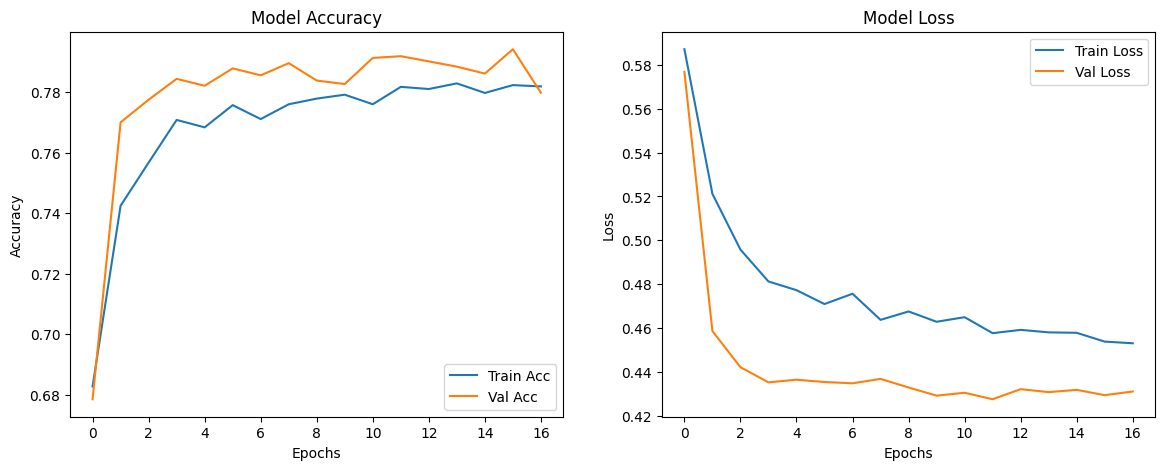

In [36]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       863
           1       0.79      0.80      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


🧾 Confusion Matrix:


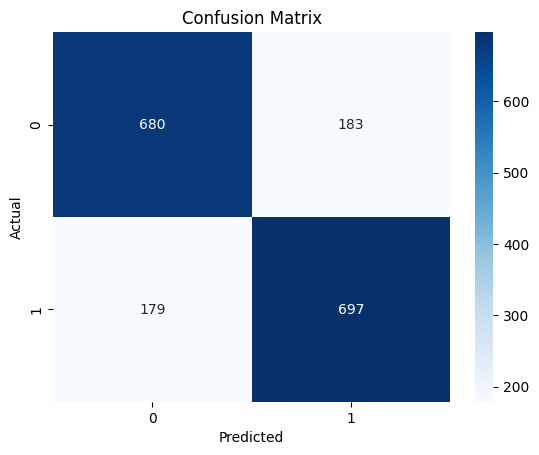

In [37]:
val_preds = (model.predict(X_val) > 0.5).astype(int)

print("\n🔍 Classification Report:")
print(classification_report(y_val, val_preds))

print("\n🧾 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()